<a href="https://colab.research.google.com/github/DiegoCorona/DataSource.AI_Competencia_Deteccion_de_Fraude/blob/main/DataSource_AI_Detecci%C3%B3n_de_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección De Fraudes Con Tarjetas de Crédito.**

Este proyecto es parte de las **competencias** realizadas por [DataSource.AI](https://www.datasource.ai/es/home/data-science-competitions-for-startups), la cual buscá que los usuarios puedan prácticar la aplicación de técnicas en Ciencia de Datos y Machine Learning para resolver problemas prácticos.

Esté proyecto busca analizar el comportamiento de usuarios para poder detectar fraudes bancarios.

## **Descripción**

*Imagínese que usted se encuentra comprando el último gadget tecnológico de moda en su almacén favorito, dentro de un centro comercial. Cuando va a pagar usted entrega su tarjeta de crédito al cajero, y luego este le dice que su tarjeta ha sido declinada, o incluso ha sido cancelada. Se trata de una sospecha de fraude, debido a que, por ejemplo, usted nunca ha hecho una compra de más de $1.500 USD, por tanto la transacción levanta sospechas en el banco y este rechaza la transacción e incluso bloquea su tarjeta de crédito.*

*Es una situación que en teoría, permite ahorrar millones de dólares, y de dolores de cabeza, para sus clientes. Sin embargo, cuando este sistema no es acertado genera una mala experiencia con el consumidor, haciéndolo sentirse avergonzado y frustrado, ya que probablemente no finaliza la compra con éxito.*

*Los bancos y los proveedores de tarjetas de crédito, deben asegurarse de que sus sistemas son acertados, y de que la detección del fraude es correcta. Ese es el propósito de esta competición, poder mejorar esos sistemas de detección de fraudes con tarjeta de crédito.*

El dataset se encuentra aqui: https://www.datasource.ai/es/home/data-science-competitions-for-startups/deteccion-de-fraudes-con-tarjetas-de-credito


### Descripción de los Datos:

El conjunto de datos contiene las transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeas.

Este conjunto de datos presenta transacciones ocurridas en dos días. El conjunto de datos está muy desequilibrado, **la clase positiva (fraudes) representa aproximadamente el 0,172% de todas las transacciones.**

Sólo contiene variables numéricas de entrada que son el resultado de una transformación PCA. Lamentablemente, por cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información sobre los datos. Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Amount'.

La característica "Tiempo" contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica "Amount" es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible a los costes en función del ejemplo. La característica "Class" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

El conjunto de datos ha sido recopilado y analizado durante una colaboración de investigación de Worldline y el Grupo de Aprendizaje Automático (http://mlg.ulb.ac.be) de la ULB (Universidad Libre de Bruselas) sobre minería de datos y detección de fraudes.

En https://www.researchgate.net/project/Fraud-detection-5 y en la página del proyecto DefeatFraud se pueden encontrar más detalles sobre proyectos actuales y pasados sobre temas relacionados.


## **Desarrollo**

Primero importo algunas librerías que se usarán a los largo del proyecto.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Detección de fraudes/Train.csv', index_col= 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,0.817597,1.955442,-1.931419,-0.257484,0.105424,0.455430,0.920216,0.520283,-0.343180,0.106248,0.417848,0.489745,-0.295050,-0.599263,-0.484981,-0.994767,1.120258,0.481573,0.055996,0.500978,43.92,0
2,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,0.535062,0.155422,-1.042766,-0.742276,-0.710065,-1.130356,-0.056519,0.218070,0.385920,-0.044770,-0.007200,-0.366702,-0.419797,-0.335424,0.548648,0.172697,-0.291240,0.275663,0.269275,0.667690,14.17,0
3,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,0.231304,-1.068889,-1.177646,0.673190,0.962988,-0.102757,0.203563,-0.090727,-0.266767,0.410808,0.129151,-0.110882,0.401123,1.250059,-0.253317,0.113877,-0.235661,-0.127742,0.096903,0.095731,0.80,0
4,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,-0.585687,-1.444333,-1.658632,-0.366804,0.280739,-0.290148,0.875651,0.436531,0.526640,1.031674,0.330084,-0.242768,0.317289,0.646278,-0.506730,-1.117083,0.500530,0.035332,-0.401375,0.004993,3.91,0
5,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,-0.140411,0.339049,-0.864750,0.021621,-0.221197,0.837393,0.305125,-0.392624,-0.442570,-0.404091,-0.412113,-0.155811,0.144520,0.369164,-0.033627,0.600179,0.469150,-0.512841,-0.045404,-0.048915,59.70,0


Leemos el dataset y notamos que, en efecto, el desbalanceo es claro.

Dado este desbalance, el problema se debe resolver por medio de técnicas para la detección de anomalías

In [ ]:
df['class'].value_counts()

0    142157
1       246
Name: class, dtype: int64

En particular, haré uso de metodos estadísticos para ajustar una función de distribución de probabilidad normal multivariada a los datos que contienen solamente registros comunes, y con el uso de un umbral *epsilon*, será el límite de decisión para definir sí un registro es un *fraude*, o no lo es, esto en el conjunto de validación.

Considerando esto último, separé el dataset en dos, uno en el cual se juntarán todos los registros **"normales" o comunes**, que no representan un fraude bancario *(no_fraude)* y otro dataset con los registros fraudulentos *(fraude)*.

In [ ]:
fraude = df[df['class'] == 1]
no_fraude = df[df['class'] == 0]

In [ ]:
fraude.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

Separamos los datos en variables predictoras (contenidas en las variables con comienzo **X**), y variables objetivo (variables con comienzo **y**)

In [ ]:
X_no_fraude = no_fraude[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_no_fraude = no_fraude['class']

In [ ]:
X_fraude = fraude[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_fraude = fraude['class']

Creamos las variables **X_train, X_cv0, y_train, y_cv0** que contienen solo registros no fraudulentos, las terminaciones **train** se ocuparán para ajustar la función de densidad multivariable, y se ocupa un 20% del los regirtros no fraudulentos (y guardados en las variables con termino **cv0**) para los conjuntos de validación cruzada (para elegir el mejor umbral) y el conjunto de prueba (para medir el rendimiento real de modelo).

In [ ]:
X_train, X_cv0, y_train, y_cv0 = train_test_split(X_no_fraude, y_no_fraude, test_size = 0.2, random_state = 23, shuffle = True)

In [ ]:
### Conjuntos para el entrenamiento
print(X_train.shape)
print(y_train.shape)
y_train.value_counts()

(113725, 30)
(113725,)


0    113725
Name: class, dtype: int64

Creamos los conjuntos validación cruzada **(X_cv, y_cv)** y de prueba **(X_test, y_test)** finales, estos ya cuentas con registros no fraudulentos como fraudulentos, el set de validación servirá para obtener el mejor umbral posible que pueda separar mejor las dos categórias, mientras que el set de prueba se usará para medir el rendimiento del modelo en ejemplos nuevos. 

In [ ]:
X_cv_n, X_test_n, y_cv_n, y_test_n = train_test_split(X_cv0, y_cv0, test_size = 0.5, random_state = 54, shuffle = True)
X_cv_f, X_test_f, y_cv_f, y_test_f = train_test_split(X_fraude, y_fraude, test_size = 0.5, random_state = 54, shuffle = True)

In [ ]:
y_cv = y_cv_n.append(y_cv_f)

In [ ]:
y_test = y_test_n.append(y_test_f)

In [ ]:
X_cv = X_cv_n.append(X_cv_f)

In [ ]:
X_test = X_test_n.append(X_test_f)

In [ ]:
X_cv = X_cv.sort_index(ascending= True)
y_cv = y_cv.sort_index(ascending= True)

In [ ]:
X_test = X_test.sort_index(ascending= True)
y_test = y_test.sort_index(ascending= True)

In [ ]:
#### Set de validación (probar umbrales)
## X_cv, y_cv

#### Set de Prueba
## X_test, y_test

Ajustamos el modelo normal multivariado con el set de entremamiento, la idea con esto es: El modelo se ajusta a los ejemplos **comunes**, dando valores altos con la función de densidad, al momento de calcular la función de densidad para ejemplos fraudulentos estos caerán en las colas de la distribución teniendo un valor extremadamente pequeño, comparado con lo de los ejemplos no fraudulentos.

In [ ]:
medias = X_train.mean()

In [ ]:
covarianzas = X_train.cov()

Ajuste de la distribución.

In [ ]:
multi_mormal = st.multivariate_normal(mean = medias, cov = covarianzas, allow_singular= True)

Se tienen que probar con un gran cantidad de umbrales **(epsilon)**, tomando en cuenta el que tiene mejor rendimiento en el set de validación cruzada.

Registramos el umbral utilizado y la métrica AUC obtenida es el set de validación. El mejor modelo será aquel que obtenga el AUC más alto.

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

proba_cv = multi_mormal.pdf(X_cv)

mejor_auc = 0 
best_epsilon = 0
max_e = 2.062044871798754e-22
min_e = proba_cv.min()
step = (max_e - min_e) / 1000
 
for epsilon in np.arange(min_e, max_e, step):
  predicciones = proba_cv < epsilon
 
  auc = roc_auc_score(np.array(y_cv), predicciones)
  print('epsilon: ', epsilon)
  print('AUC: ', auc)
  print('-'*80)
 
  if mejor_auc < auc:
    mejor_auc = auc
    best_epsilon = epsilon
 
 
print('La mejor epsilon: ', best_epsilon)
print('Mejor AUC: ', mejor_auc)

epsilon:  0.0
AUC:  0.5
--------------------------------------------------------------------------------
epsilon:  2.062044871798754e-25
AUC:  0.8050404673996092
--------------------------------------------------------------------------------
epsilon:  4.124089743597508e-25
AUC:  0.8099699296796006
--------------------------------------------------------------------------------
epsilon:  6.186134615396262e-25
AUC:  0.8167283171143472
--------------------------------------------------------------------------------
epsilon:  8.248179487195016e-25
AUC:  0.8192809773483216
--------------------------------------------------------------------------------
epsilon:  1.031022435899377e-24
AUC:  0.8178389402070723
--------------------------------------------------------------------------------
epsilon:  1.2372269230792524e-24
AUC:  0.8207784884545526
--------------------------------------------------------------------------------
epsilon:  1.4434314102591278e-24
AUC:  0.8200398840651322
--------

La siguiente es el mejor umbral en el set de validación cruzada:

In [ ]:
best_epsilon

2.2270084615426544e-23

El valor de la Métrica AUC es 0.8365

In [ ]:
pred = (proba_cv < best_epsilon)

roc_auc_score(np.array(y_cv), pred)

0.8365422448540749

In [ ]:
confusion_matrix(y_cv, pred, normalize = 'true')

array([[0.876, 0.124],
       [0.203, 0.797]])

In [ ]:
prueba = multi_mormal.pdf(X_test)

In [ ]:
predcciones_prueba = (prueba < best_epsilon)

EL rendimiento en el set de prueba es de un AUC de 0.818113, por lo que no se observa sobreajuste y se tiene un rendimiento aceptable.

In [ ]:
roc_auc_score(np.array(y_test), predcciones_prueba)

0.8181366123593706

In [ ]:
confusion_matrix(y_test, predcciones_prueba)

array([[12397,  1819],
       [   29,    94]])

In [ ]:
df_prueba = pd.read_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Detección de fraudes/Test.csv', index_col= 0)
df_prueba.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,137258.0,1.358302,-1.182487,-2.493830,0.488218,0.258770,-0.304717,0.532905,-0.223698,1.070746,-1.008914,-1.273435,-0.140944,-0.214297,-1.364117,0.051559,0.304344,0.791131,0.424735,0.322362,0.620256,-0.080010,-0.870973,-0.207011,-0.134575,-0.086101,-0.113911,-0.085983,0.042750,387.50
2,147298.0,-1.304161,2.131949,-0.838896,3.155487,0.524203,-0.530462,0.545692,0.535868,-1.594945,1.265285,-1.979965,-1.105615,-1.492458,1.071217,-1.237857,0.321425,-0.155832,-0.115002,-1.246489,-0.616521,0.506486,1.276061,-0.157185,-0.020511,-0.801740,0.070055,-1.008059,-0.402236,7.59
3,140451.0,-0.096751,1.162059,-0.534671,-0.604715,0.883683,-0.759341,0.934334,-0.057821,0.189551,-0.526408,-0.697838,-0.258745,-0.289963,-1.024447,-0.140164,0.277521,0.418183,-0.273518,-0.315917,0.119217,-0.372934,-0.864456,0.111205,0.488024,-0.390410,0.125219,0.333239,0.142155,6.99
4,35801.0,-0.990465,0.759625,0.611074,0.769580,0.082927,0.011053,0.125135,0.733668,-0.633679,-0.085489,0.607649,-0.393854,-2.033051,1.268559,0.799482,-0.105417,0.008465,0.575007,0.448614,0.060028,0.236350,0.444033,-0.007983,-0.354241,-0.286025,-0.279814,0.281404,0.098528,50.00
5,131269.0,-0.920443,0.299100,-0.015312,-1.102493,1.855515,-1.945901,1.063730,-0.528711,0.264440,-1.183685,-0.797609,-0.624512,-0.677694,-1.134652,-0.103606,0.638246,-0.202508,0.628749,-1.650848,-0.361849,0.209672,0.815771,-0.511291,-0.187107,-0.061418,-0.404762,-0.048434,-0.056745,15.73


In [ ]:
prueba_final = multi_mormal.pdf(df_prueba)

In [ ]:
final = (prueba_final < best_epsilon)

In [ ]:
df_final = pd.DataFrame(final, columns= ['class'], index = np.arange(1, len(final)+1, 1))
df_final = df_final['class'].replace({False: 0, True : 1})

In [ ]:
df_final.to_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Detección de fraudes/Predicciones.csv')

Estos son los resultados en el set de prueba dado por los patrocinadores de la competencia.

## Notas:

Envio 1.

1. Umbral: 2.2270084615426544e-23  
2. AUC : 0.830605465558451

### **Optimizando el modelo**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,0.817597,1.955442,-1.931419,-0.257484,0.105424,0.455430,0.920216,0.520283,-0.343180,0.106248,0.417848,0.489745,-0.295050,-0.599263,-0.484981,-0.994767,1.120258,0.481573,0.055996,0.500978,43.92,0
2,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,0.535062,0.155422,-1.042766,-0.742276,-0.710065,-1.130356,-0.056519,0.218070,0.385920,-0.044770,-0.007200,-0.366702,-0.419797,-0.335424,0.548648,0.172697,-0.291240,0.275663,0.269275,0.667690,14.17,0
3,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,0.231304,-1.068889,-1.177646,0.673190,0.962988,-0.102757,0.203563,-0.090727,-0.266767,0.410808,0.129151,-0.110882,0.401123,1.250059,-0.253317,0.113877,-0.235661,-0.127742,0.096903,0.095731,0.80,0
4,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,-0.585687,-1.444333,-1.658632,-0.366804,0.280739,-0.290148,0.875651,0.436531,0.526640,1.031674,0.330084,-0.242768,0.317289,0.646278,-0.506730,-1.117083,0.500530,0.035332,-0.401375,0.004993,3.91,0
5,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,-0.140411,0.339049,-0.864750,0.021621,-0.221197,0.837393,0.305125,-0.392624,-0.442570,-0.404091,-0.412113,-0.155811,0.144520,0.369164,-0.033627,0.600179,0.469150,-0.512841,-0.045404,-0.048915,59.70,0


Me dio curiosidad graficar la variable 'Time', y noté que no era una variable que pudiera separar ambas clases, así que decidí eliminar esta variable para el ajuste del modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


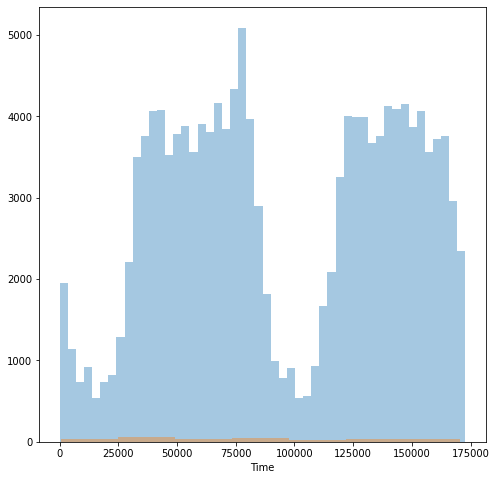

In [ ]:
fig = plt.figure(figsize= [8, 8])
ax = sns.distplot(df[df['class'] == 0]['Time'], kde = False, norm_hist= False)
sns.distplot(df[df['class'] == 1]['Time'], kde = False, norm_hist= False, ax = ax)

In [ ]:
fraude = df[df['class'] == 1]
no_fraude = df[df['class'] == 0]

X_no_fraude = no_fraude[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_no_fraude = no_fraude['class']

X_fraude = fraude[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_fraude = fraude['class']

X_train, X_cv0, y_train, y_cv0 = train_test_split(X_no_fraude, y_no_fraude, test_size = 0.2, random_state = 23, shuffle = True)

X_cv_n, X_test_n, y_cv_n, y_test_n = train_test_split(X_cv0, y_cv0, test_size = 0.5, random_state = 54, shuffle = True)
X_cv_f, X_test_f, y_cv_f, y_test_f = train_test_split(X_fraude, y_fraude, test_size = 0.5, random_state = 54, shuffle = True)

y_cv = y_cv_n.append(y_cv_f)

y_test = y_test_n.append(y_test_f)

X_cv = X_cv_n.append(X_cv_f)

X_test = X_test_n.append(X_test_f)

X_cv = X_cv.sort_index(ascending= True)
y_cv = y_cv.sort_index(ascending= True)

X_test = X_test.sort_index(ascending= True)
y_test = y_test.sort_index(ascending= True)

medias = X_train.mean()

covarianzas = X_train.cov()

multi_mormal = st.multivariate_normal(mean = medias, cov = covarianzas, allow_singular= True)

proba_cv = multi_mormal.pdf(X_cv)

from sklearn.metrics import roc_auc_score, confusion_matrix

mejor_auc = 0 
best_epsilon = 0
max_e = 2.062044871798754e-22
min_e = proba_cv.min()
step = (max_e - min_e) / 10000
 
for epsilon in np.arange(min_e, max_e, step):
  predicciones = proba_cv < epsilon
 
  auc = roc_auc_score(np.array(y_cv), predicciones)
  print('epsilon: ', epsilon)
  print('AUC: ', auc)
  print('-'*80)
 
  if mejor_auc < auc:
    mejor_auc = auc
    best_epsilon = epsilon
 
 
print('La mejor epsilon: ', best_epsilon)
print('Mejor AUC: ', mejor_auc)

pred = (proba_cv < best_epsilon)

roc_auc_score(np.array(y_cv), pred)

confusion_matrix(y_cv, pred, normalize = 'true')

prueba = multi_mormal.pdf(X_test)

predcciones_prueba = (prueba < best_epsilon)

roc_auc_score(np.array(y_test), predcciones_prueba)

Se han truncado las últimas 5000 líneas del flujo de salida.
epsilon:  1.7185081961570814e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.7187144006442613e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.7189206051314412e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.719126809618621e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.719333014105801e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.719539218592981e-22
AUC:  0.9127917816178724
--------------------------------------------------------------------------------
epsilon:  1.7197454230801608e-22
AUC:  0.9127917816178724
--------------------------------------------------

0.9085251474349296

In [ ]:
predcciones_prueba = (prueba < best_epsilon)

Con este pequeño ajuste se obtuvo una mejora considerable en el set de prueba, opteniendo un buen comportamiento en el set de prueba.

Esto confirma que la variable 'Time? solo era ruido para el modelo.

In [ ]:
confusion_matrix(y_test, predcciones_prueba)

array([[13580,   636],
       [   17,   106]])

In [ ]:
df_prueba = pd.read_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Detección de fraudes/Test.csv', index_col= 0)
df_prueba.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
df_prueba = df_prueba[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [ ]:
prueba_final = multi_mormal.pdf(df_prueba)

final = (prueba_final < best_epsilon)

df_final = pd.DataFrame(final, columns= ['class'], index = np.arange(1, len(final)+1, 1))
df_final = df_final['class'].replace({False: 0, True : 1})

df_final

df_final.to_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Detección de fraudes/Predicciones_1.csv')

Estos son los resultados en el set de prueba de los creadores de la competencia:

## Notas
- epsilon = 4.124089743597508e-25 ====> AUC = 0.9257587499065255

- epsilon = 3.216790000006056e-28 ====> AUC = 0.920356449464218

- epsilon = 2.4744538461585044e-25 ====> AUC = 0.9264763017883405

